In [ ]:
# Install required libraries
# The basic structure of this code is provided by Professor Alina Vereshchaka, and the specific topics, AI environment, training results and result verification are designed and coding by Xudong Liu.
!pip install gymnasium matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 8.4 MB/s eta 0:00:00


In [ ]:
# Import required libraries
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
grid = np.zeros((4,4)) #this is how you define a 3x3 grid
print(grid)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


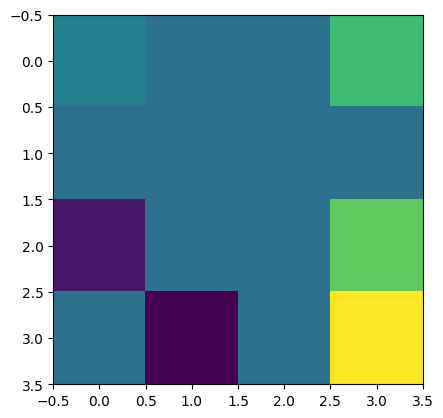

In [ ]:
pos1 = [0,0] #start position of our agent
pos2 = [0,3] #reward1 position of our agent
pos3 = [2,3] #reward2 position of our agent
pos4 = [2,0] #reward3 position of our agent
pos5 = [3,1] #reward4 position of our agent
pos6 = [3,3] #goal position of our agent
grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 5
grid[tuple(pos3)] = 6
grid[tuple(pos4)] = -5
grid[tuple(pos5)] = -6
grid[tuple(pos6)] = 10

plt.imshow(grid)

In [ ]:
# Definition of the Grid Environment class.

class GridEnvironment(gym.Env):
    # Attribute of a Gym class that provides info about the render modes
    metadata = { 'render.modes': [] }

    # Initialization function
    def __init__(self):

      self.observation_space = spaces.Discrete(16)
      self.action_space = spaces.Discrete(4)
      self.max_timesteps = 10

      self.timestep = 0
      self.agent_pos = [0,0]
      self.goal_pos = [3,3]
      self.rwd1_pos = [0,3]
      self.rwd2_pos = [2,3]
      self.rwd3_pos = [2,0]
      self.rwd4_pos = [3,1]
      self.state = np.zeros((4,4))
      self.state[tuple(self.agent_pos)] = 20
      self.state[tuple(self.rwd1_pos)] = 5
      self.state[tuple(self.rwd2_pos)] = 6
      self.state[tuple(self.rwd3_pos)] = -5
      self.state[tuple(self.rwd4_pos)] = -6
      self.state[tuple(self.goal_pos)] = 10

    # Reset function
    def reset(self, **kwargs):

      self.state = np.zeros((4,4))
      self.state[tuple(self.agent_pos)] = 20
      self.state[tuple(self.rwd1_pos)] = 5
      self.state[tuple(self.rwd2_pos)] = 6
      self.state[tuple(self.rwd3_pos)] = -5
      self.state[tuple(self.rwd4_pos)] = -6
      self.state[tuple(self.goal_pos)] = 10
      observation = self.state.flatten()

      info = {}

      return observation, info

    # Step function: Contains the implementation for what happens when an
    # agent takes a step in the environment.
    def step(self, action):

      if action == 0: #down
        self.agent_pos[0] += 1
      if action == 1: #up
        self.agent_pos[0] -= 1
      if action == 2: #right
        self.agent_pos[1] += 1
      if action == 3: #left
        self.agent_pos[1] -= 1

      # # Comment this to demonstrate the truncation condition.
      # self.agent_pos = np.clip(self.agent_pos, 0, 2)

      self.state = np.zeros((4,4))
      self.state[tuple(self.agent_pos)] = 20
      self.state[tuple(self.rwd1_pos)] = 5
      self.state[tuple(self.rwd2_pos)] = 6
      self.state[tuple(self.rwd3_pos)] = -5
      self.state[tuple(self.rwd4_pos)] = -6
      self.state[tuple(self.goal_pos)] = 10
      observation = self.state.flatten()

      reward = 0
      if np.array_equal(self.agent_pos, self.goal_pos):
        reward = 10
      elif np.array_equal(self.agent_pos, self.rwd1_pos):
        reward = 5
      elif np.array_equal(self.agent_pos, self.rwd2_pos):
        reward = 6
      elif np.array_equal(self.agent_pos, self.rwd3_pos):
        reward = -5
      elif np.array_equal(self.agent_pos, self.rwd4_pos):
        reward = -6

      self.timestep += 1

      # Condition to check for termination (episode is over)
      terminated = True if (self.timestep >= self.max_timesteps or np.array_equal(self.agent_pos, self.goal_pos)) else False

      # Condition to check if agent is traversing to a cell beyond the permitted cells
      # This helps the agent to learn how to behave in a safe and predictable manner
      # truncated = True if np.all((self.agent_pos >=0 ) & (self.agent_pos <= 2)) else False

      info = {}

      return observation, reward, terminated, truncated, info

    # Render function: Visualizes the environment
    def render(self):
      plt.title('Grid Environment')
      plt.imshow(self.state)

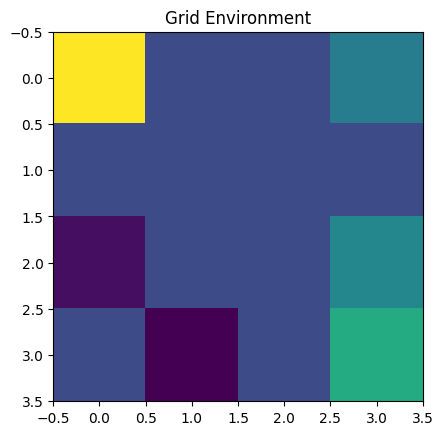

In [ ]:
env = GridEnvironment()

terminated, truncated = False, False
obs, info = env.reset()
env.render()


[0, 0]
Action: 3 , Reward: 0 , Done: False
[0, -1]


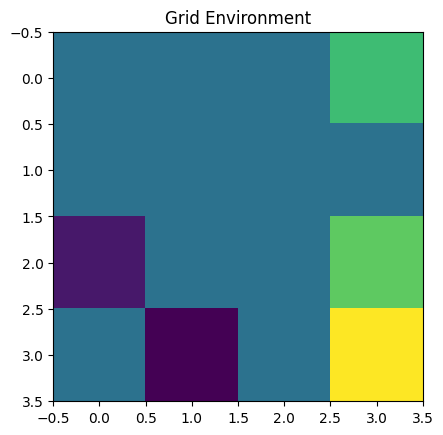

In [ ]:
action = 3
print(env.agent_pos)
observation, reward, done, truncated, info = env.step(action)
print('Action:', action, ', Reward:', reward, ', Done:', terminated)
print(env.agent_pos)
env.render()

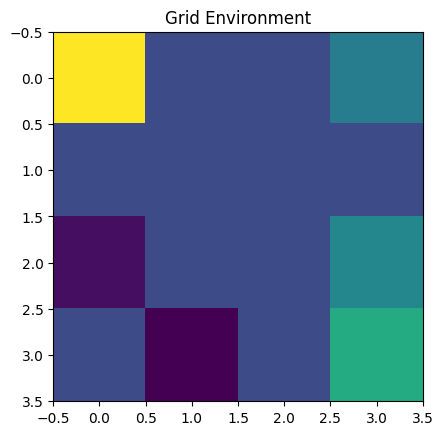

In [ ]:
action = 2
observation, reward, done, truncated, info = env.step(action)
env.render()

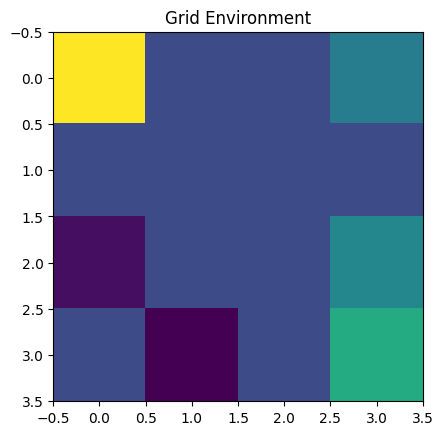

In [ ]:
action = 4
observation, reward, done, truncated, info = env.step(action)
env.render()

In [ ]:
# Definition an agent that takes action randomly
class RandomAgent:

  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space


  def findLargestIn2(self,a,b,tb,stateNumber):
    if tb[stateNumber][a] >= tb[stateNumber][b]:
      return a
    else:
      return b

  def findLargestIn3(self,a,b,c,tb,stateNumber):
    if tb[stateNumber][a] >= tb[stateNumber][b] and tb[stateNumber][a] >= tb[stateNumber][c]:
      return a
    elif tb[stateNumber][b] >= tb[stateNumber][a] and tb[stateNumber][b] >= tb[stateNumber][c]:
      return b
    else:
      return c
  def findLargestIn4(self,a,b,c,d,tb,stateNumber):
    if tb[stateNumber][a] >= tb[stateNumber][b] and tb[stateNumber][a] >= tb[stateNumber][c] and tb[stateNumber][a] >= tb[stateNumber][d]:
      return a
    elif tb[stateNumber][b] >= tb[stateNumber][a] and tb[stateNumber][b] >= tb[stateNumber][c] and tb[stateNumber][b] >= tb[stateNumber][d]:
      return b
    elif tb[stateNumber][c] >= tb[stateNumber][a] and tb[stateNumber][c] >= tb[stateNumber][b] and tb[stateNumber][c] >= tb[stateNumber][d]:
      return c
    else:
      return d

  def randomAction(self,env):
    if env.agent_pos[0] == 3:
      if env.agent_pos[1] == 0:
        res = np.random.choice([1,2], size = 1)[0]
      elif env.agent_pos[1] == 3:
        res = np.random.choice([1,3], size = 1)[0]
      else:
        res = np.random.choice([1,2,3], size = 1)[0]
    elif env.agent_pos[0] == 0:
      if env.agent_pos[1] == 0:
        res = np.random.choice([0,2], size = 1)[0]
      elif env.agent_pos[1] == 3:
        res = np.random.choice([0,3], size = 1)[0]
      else:
        res = np.random.choice([0,2,3], size = 1)[0]
    else:
      if env.agent_pos[1] == 0:
        res = np.random.choice([0,1,2], size = 1)[0]
      elif env.agent_pos[1] == 3:
        res = np.random.choice([0,1,3], size = 1)[0]
      else:
        res = np.random.choice([0,1,2,3], size = 1)[0]
    return res

  def pickBest(self,Q_table,env):
    stateNumber = env.agent_pos[0]*4 + env.agent_pos[1]
    if env.agent_pos[0] == 3:
      if env.agent_pos[1] == 0:
        res = self.findLargestIn2(1,2,Q_table,stateNumber)
      elif env.agent_pos[1] == 3:
        res = self.findLargestIn2(1,3,Q_table,stateNumber)
      else:
        res = self.findLargestIn3(1,2,3,Q_table,stateNumber)
    elif env.agent_pos[0] == 0:
      if env.agent_pos[1] == 0:
        res = self.findLargestIn2(0,2,Q_table,stateNumber)
      elif env.agent_pos[1] == 3:
        res = self.findLargestIn2(0,3,Q_table,stateNumber)
      else:
        res = self.findLargestIn3(0,2,3,Q_table,stateNumber)
    else:
      if env.agent_pos[1] == 0:
        res = self.findLargestIn3(0,1,2,Q_table,stateNumber)
      elif env.agent_pos[1] == 3:
        res = self.findLargestIn3(0,1,3,Q_table,stateNumber)
      else:
        res = self.findLargestIn4(0,1,2,3,Q_table,stateNumber)
    return res

  def step(self, obs, Q_table, eGreedy):
    """Takes a step in the environment by choosing an action randomly.

    Args:
        obs: The current observation.

    Returns:
        The action to take.
    """

    res = 0

    if type(Q_table) == type(None):
      return self.randomAction(env)
    else:
      p = np.random.random()
      if p < eGreedy:
        return self.randomAction(env)
      else:
        return self.pickBest(Q_table,env)


Action: 2 , Reward: 0 , Done: False
Action: 2 , Reward: 0 , Done: False
Action: 2 , Reward: 5 , Done: False
Action: 3 , Reward: 0 , Done: False
Action: 2 , Reward: 5 , Done: False
Action: 0 , Reward: 0 , Done: False
Action: 1 , Reward: 5 , Done: False
Action: 0 , Reward: 0 , Done: False
Action: 0 , Reward: 6 , Done: False
Action: 1 , Reward: 0 , Done: True


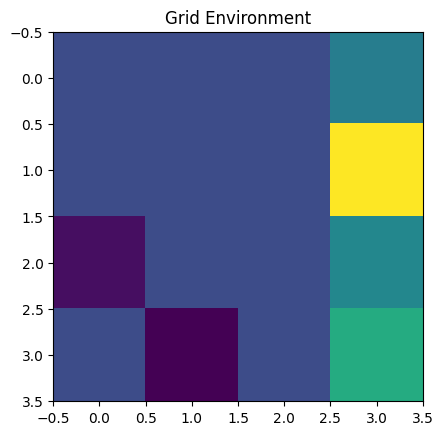

In [ ]:
# Sample code for environment and agent implementation. Also shows
# visualization of the random agent's movement across the grid. The yellow cell
# shows the movement of the agent.

if __name__ == '__main__':
  env = GridEnvironment()
  agent = RandomAgent(env)

  obs, info = env.reset()
  terminated, truncated = False, False


  while not terminated:
    action = agent.step(obs,None,None)
    obs, reward, terminated, truncated, info = env.step(action)
    print('Action:', action, ', Reward:', reward, ', Done:', terminated)
    env.render()

[array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]), array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]), array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 

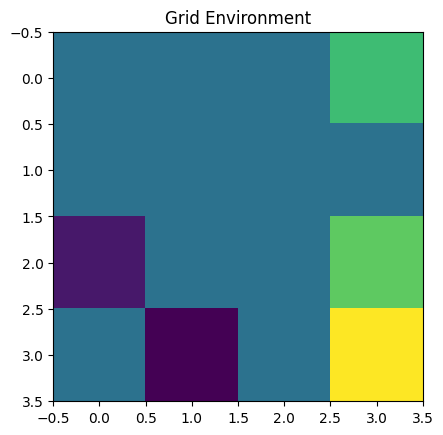

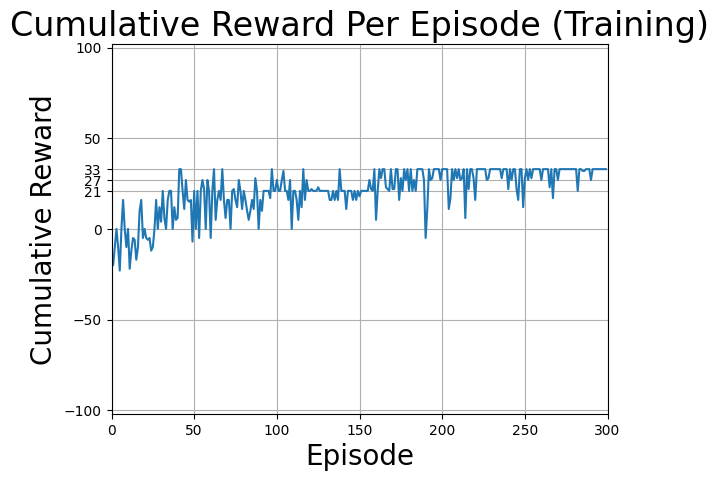

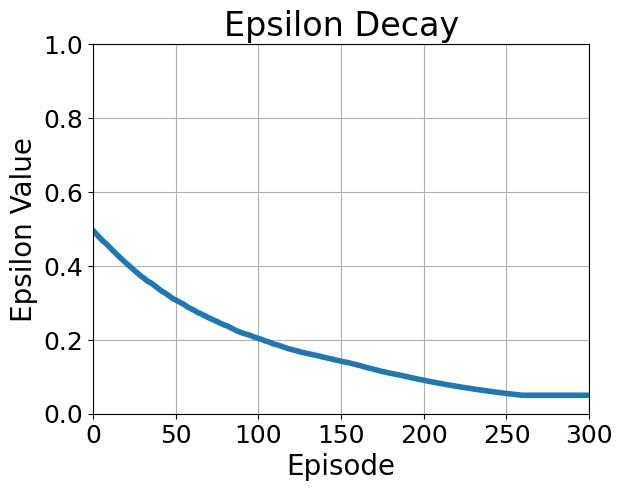

In [ ]:
# SARAS algo
#Initialize the Q-table to 0

if __name__ == '__main__':
  env = GridEnvironment()
  agent = RandomAgent(env)

  obs, info = env.reset()
  terminated, truncated = False, False

  Q_table = []
  for i in range(0,env.max_timesteps+1):
    Q_table.append(np.zeros((16,4)))

  episodesTimes = 300
  e_greedy = 0.5
  alpha = 0.2
  gamma = 0.8
  totalRwd = [0]*episodesTimes
  e_greedyTimeLine = [0]*episodesTimes

  print(Q_table)
  for i in range(0,episodesTimes):
    env = GridEnvironment()
    agent = RandomAgent(env)
    obs, info = env.reset()
    terminated, truncated = False, False
    action = agent.step(obs,Q_table[env.timestep],e_greedy)
    nextAction = None
    state = env.agent_pos[0]*4+env.agent_pos[1]
    nextState = None
    while not terminated:
      obs, reward, terminated, truncated, info = env.step(action)
      # print('Action:', action, ', Reward:', reward, ', Done:', terminated)
      totalRwd[i] = totalRwd[i] + reward
      e_greedyTimeLine[i] = e_greedy
      nextState = env.agent_pos[0]*4+env.agent_pos[1]
      nextAction = agent.step(obs,Q_table[env.timestep],e_greedy)
      Q_table[env.timestep-1][state][action] = Q_table[env.timestep-1][state][action] + alpha*(reward+gamma*(Q_table[env.timestep][nextState][nextAction])-Q_table[env.timestep][state][action])
      state = nextState
      action = nextAction
      e_greedy = e_greedy * 0.999
      if e_greedy < 0.05:
        e_greedy = 0.05
    # print('episodesTimes:', i)
    # print('e-Greedy',e_greedyTimeLine[i])
    # print('tatol reward:', totalRwd[i])
  env.render()
  print(Q_table)

  plt.figure()
  plt.plot(totalRwd)
  plt.xlabel('Episode', fontsize=20)
  plt.ylabel('Cumulative Reward', fontsize=20)
  plt.title('Cumulative Reward Per Episode (Training)', fontsize=24)
  plt.xticks(fontsize=10)
  plt.yticks([-100, -50, 0, 21, 27 , 33, 50, 100], fontsize=10)
  plt.ylim(ymin=-102, ymax=102)
  plt.xlim(xmin=0, xmax=300)
  plt.grid()
  plt.show()

  plt.figure()
  plt.plot(e_greedyTimeLine, linewidth=4)
  plt.xlabel('Episode', fontsize=20)
  plt.ylabel('Epsilon Value', fontsize=20)
  plt.title('Epsilon Decay', fontsize=24)
  plt.xticks(fontsize=18)
  plt.yticks(fontsize=18)
  plt.ylim(ymin=0, ymax=1)
  plt.xlim(xmin=0, xmax=300)
  plt.grid()
  plt.show()


[[[ 2.61840212e+18  0.00000000e+00  2.37048518e+24  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+

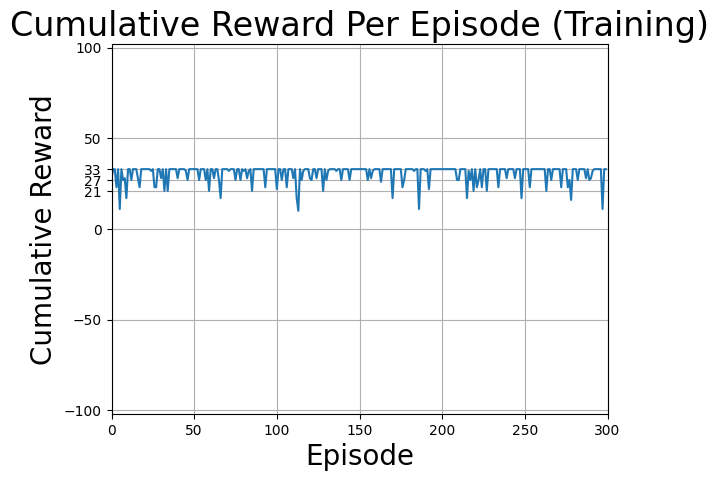

In [ ]:
# Genetic algorithm
if __name__ == '__main__':
  import copy

  env = GridEnvironment()
  agent = RandomAgent(env)

  obs, info = env.reset()
  terminated, truncated = False, False

  Q_table = []
  for i in range(0,env.max_timesteps+1):
    Q_table.append(np.zeros((16,4)))
  Q_tableArray = []
  for i in range(0,10):
    Q_tableArray.append(copy.deepcopy(Q_table))
  totalRwd = [0]*episodesTimes
  totalRwdArray = []
  totalRwdCalCache = [0]*10
  for i in range(0,10):
    totalRwdArray.append(copy.deepcopy(totalRwd))

  episodesTimes = 300
  e_greedy = 0.5
  alpha = 0.2
  gamma = 0.8
  e_greedyTimeLine = [0]*episodesTimes

  # How many gen to pass
  for n in range(0,10):
    # How many agent in each gen
    for j in range(0,10):
      # episodes Time for each agent
      for i in range(0,episodesTimes):
        env = GridEnvironment()
        agent = RandomAgent(env)
        obs, info = env.reset()
        terminated, truncated = False, False
        action = agent.step(obs,Q_tableArray[j][env.timestep],e_greedy)
        nextAction = None
        state = env.agent_pos[0]*4+env.agent_pos[1]
        nextState = None
        while not terminated:
          obs, reward, terminated, truncated, info = env.step(action)

          totalRwdArray[j][i] = totalRwdArray[j][i] + reward
          e_greedyTimeLine[i] = e_greedy
          nextState = env.agent_pos[0]*4+env.agent_pos[1]
          nextAction = agent.step(obs,Q_tableArray[j][env.timestep],e_greedy)
          Q_tableArray[j][env.timestep-1][state][action] = Q_tableArray[j][env.timestep-1][state][action] + alpha*(reward+gamma*(Q_tableArray[j][env.timestep][nextState][nextAction])-Q_tableArray[j][env.timestep][state][action])
          state = nextState
          action = nextAction
          e_greedy = e_greedy * 0.999
          if e_greedy < 0.05:
            e_greedy = 0.05
      totalRwdCalCache[j] = np.mean(totalRwdArray[j][-10:])+np.argmax(totalRwdArray[j][-10:])
    # At this point I will get the Q-table array and total reward for all agents in this generation
    # Get best of this gen's ID
    tmp = list(map(list,zip(range(len(totalRwdCalCache)), totalRwdCalCache)))
    large = sorted(tmp,key=lambda x:x[1],reverse=True)
    nextGenQ_table = np.multiply(Q_tableArray[large[0][0]],0.1)
    Q_tableFinal = Q_tableArray[large[0][0]]
    Q_tableArray = [nextGenQ_table]*10
    totalRwdFinal = totalRwdArray[large[0][0]]
    totalRwd = [0]*episodesTimes
    totalRwdArray = []
    totalRwdCalCache = [0]*10
    for i in range(0,10):
      totalRwdArray.append(copy.deepcopy(totalRwd))

  print(Q_tableFinal)

  plt.figure()
  plt.plot(totalRwdFinal)
  plt.xlabel('Episode', fontsize=20)
  plt.ylabel('Cumulative Reward', fontsize=20)
  plt.title('Cumulative Reward Per Episode (Training)', fontsize=24)
  plt.xticks(fontsize=10)
  plt.yticks([-100, -50, 0, 21, 27 , 33, 50, 100], fontsize=10)
  plt.ylim(ymin=-102, ymax=102)
  plt.xlim(xmin=0, xmax=300)
  plt.grid()
  plt.show()